In [129]:
# 4
import numpy as np

# Set the parameters
a_100 = 0.01     # a value of the error term at time 100
sigma_a = 0.025  # standard deviation of the error term
beta = 0.2       # coefficient on the lagged error term

# Generate the 1-step-ahead forecast
a_101 = np.random.normal(loc=0, scale=sigma_a) # random variable following white series
R_101 = a_101 + beta * a_100

print("1-step-ahead forecast:", R_101)

# Generate the 2-step-ahead forecast
a_102 = np.random.normal(loc=0, scale=sigma_a)
R_102 = a_102 + beta * (a_101 + beta * a_100)

print("2-step-ahead forecast:", R_102)

1-step-ahead forecast: 0.01584186690363725
2-step-ahead forecast: -0.002546885578295938


In [128]:
import numpy as np

# the variance of the forecast errors for the MA(1) :
# Var(Rt+k - (at+k + beta * at)) = Var(at+k) + beta^2 * Var(at+k-1)
# where Var(at+k) = sigma_a^2 and Var(at+k-1) = sigma_a^2

# Set the parameters
sigma_a = 0.025
beta = 0.2

# Compute the standard deviation of the forecast error for 1-step-ahead forecast
std_error_1 = np.sqrt(sigma_a**2 + (beta**2)*sigma_a**2)

# Compute the standard deviation of the forecast error for 2-step-ahead forecast
std_error_2 = np.sqrt(sigma_a**2 + (beta**2)*sigma_a**2 + (beta**2)*sigma_a**2)

print("1-step-ahead forecast error standard deviation:", std_error_1)
print("2-step-ahead forecast error standard deviation:", std_error_2)

1-step-ahead forecast error standard deviation: 0.025495097567963927
2-step-ahead forecast error standard deviation: 0.025980762113533163


In [14]:
import numpy as np

# For the MA(1) model, the theoretical autocorrelation function (ACF) is given by:
# ρ(k) = φ^k

# Therefore, for the MA(1) model with φ=0.2, we have:
# ρ(1) = 0.2^1 = 0.2
# ρ(2) = 0.2^2 = 0.04

# Set the parameters
a_t_1 = 0
sigma_a = 0.025
beta = 0.2
n_periods = 100

# Generate the error terms
a_t = np.random.normal(loc=0, scale=sigma_a, size=n_periods+1)

# Generate the returns using the MA(1) equation
R_t = np.zeros(n_periods+1)
for t in range(1, n_periods+1):
    R_t[t] = a_t[t] + beta * a_t[t-1]

# Compute the autocorrelations
lag_1_autocorr = np.corrcoef(R_t[1:], R_t[:-1])[0,1]
lag_2_autocorr = np.corrcoef(R_t[2:], R_t[:-2])[0,1]

# Compute the theoretical autocorrelations
theoretical_lag_1_autocorr = phi**1
theoretical_lag_2_autocorr = phi**2

print("Empirical lag-1 autocorrelation:", lag_1_autocorr)
print("Theoretical lag-1 autocorrelation:", theoretical_lag_1_autocorr)
print("Empirical lag-2 autocorrelation:", lag_2_autocorr)
print("Theoretical lag-2 autocorrelation:", theoretical_lag_2_autocorr)

Empirical lag-1 autocorrelation: 0.34687948088518095
Theoretical lag-1 autocorrelation: 0.2
Empirical lag-2 autocorrelation: -0.006943277039356241
Theoretical lag-2 autocorrelation: 0.04000000000000001


In [58]:
# 5
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_table("Q5m-unrate.txt")

rate = []
for i in data['Year Mon Day Rate']:
    rate.append(float(i[-3:]))
data = np.array(rate)

In [59]:
# Fit an MA(1) model to the data
model_ma = sm.tsa.statespace.SARIMAX(data, order=(0,0,1), trend="c")
results_ma = model_ma.fit()

# Fit an AR(1) model to the data
model_ar = sm.tsa.statespace.SARIMAX(data, order=(1,0,0), trend="c")
results_ar = model_ar.fit()

# Forecast the unemployment rate for April, May, June, and July of 2009 using the MA(1) model
forecast_ma = results_ma.forecast(steps=4)

# Forecast the unemployment rate for April, May, June, and July of 2009 using the AR(1) model
forecast_ar = results_ar.forecast(steps=4)

print("MA(1) model forecasts for April to July 2009:", forecast_ma)
print("AR(1) model forecasts for April to July 2009:", forecast_ar)

MA(1) model forecasts for April to July 2009: [6.8997644  5.47111602 5.47111602 5.47111602]
AR(1) model forecasts for April to July 2009: [8.41007864 8.2317625  8.06434242 7.90715261]


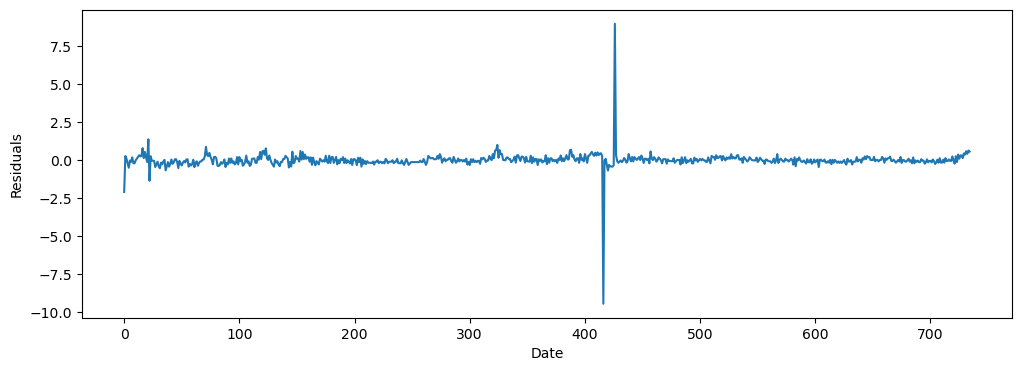

In [63]:
# We then extract the residuals of the model 
# using the resid attribute of the fitted results object. 
# and plot these residuals over time

import matplotlib.pyplot as plt

residuals = results_ar.resid
residuals = pd.Series(residuals)
residuals.plot(figsize=(12,4))
plt.ylabel("Residuals")
plt.show()

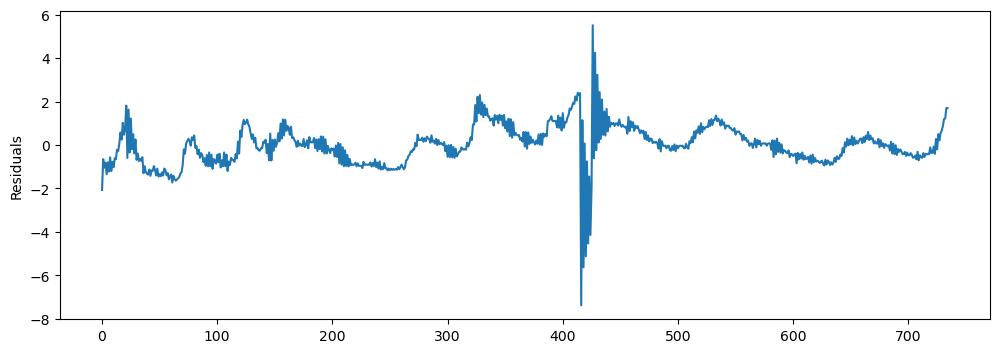

In [66]:
residuals = results_ma.resid
residuals = pd.Series(residuals)
residuals.plot(figsize=(12,4))
plt.ylabel("Residuals")
plt.show()

In [67]:
# If the residuals exhibit cyclical patterns, 
# then this may suggest the presence of business cycles in the data. 
# However, if the residuals are purely random with no discernible patterns, 
# then this may suggest the absence of business cycles.

In [120]:
# 6
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, q_stat
from scipy.stats import chi2

# i found the data from internet : https://github.com/xiaoyem/fts/blob/master/data/m-ew6299.txt 
# i cannot found according data in the google drive

data = pd.read_table('m-ew6299.txt')
data_list = [-0.792]
for i in data['  -0.792']:
    data_list.append(i)
    
data = np.array(data_list)

In [142]:
models = {}
for p in range(1, 4):
    model = ARIMA(data, order=(p, 0, 0)).fit()
    models[p] = model
    
def calculate_q_stat(acf_values, n, num_lags):
    q_stat_values = np.cumsum((n - np.arange(1, num_lags + 1)) * acf_values**2)
    p_values = chi2.sf(q_stat_values, np.arange(1, num_lags + 1))
    return q_stat_values, p_values

num_lags = 12

for p, model in models.items():
    print(f"AR({p}) Model:")
    
    # Calculate ACF and PACF
    residuals = model.resid
    acf_values = acf(residuals, nlags=num_lags, fft=True)
    pacf_values = pacf(residuals, nlags=num_lags)
    
    # Calculate Q-statistics
    q_stat_values, p_values = calculate_q_stat(acf_values[1:], len(residuals), num_lags)
    
    print("ACF:", acf_values)
    print("PACF:", pacf_values)
    print("Q-statistics:", q_stat_values)
    print("P-values:", p_values)
    print("\n")

AR(1) Model:
ACF: [ 1.          0.01489457 -0.05516232 -0.0361832  -0.01073085  0.01556859
  0.00114857 -0.03348596 -0.10457776  0.01529998  0.01053869  0.01470991
  0.10834037]
PACF: [ 1.          0.01492731 -0.05564055 -0.03483477 -0.0129133   0.01218322
 -0.00180118 -0.03345888 -0.10536062  0.0149457  -0.00378902  0.00865415
  0.11228448]
Q-statistics: [ 0.10094098  1.48240917  2.07548769  2.12753598  2.23684976  2.23744341
  2.7409115   7.64046667  7.74510468  7.79463924  7.890929   13.10243893]
P-values: [0.75070333 0.47653954 0.55688767 0.71231535 0.81549575 0.89661731
 0.90789146 0.4693542  0.56002365 0.64888835 0.72303969 0.36163918]


AR(2) Model:
ACF: [ 1.00000000e+00 -9.97814407e-04  4.87348768e-03 -2.02287065e-02
 -1.12271799e-02  1.03328377e-02 -5.69079530e-03 -3.03905168e-02
 -1.03841985e-01  1.68636050e-02  9.31928632e-03  1.06508275e-02
  1.04887386e-01]
PACF: [ 1.         -0.00100001  0.00489396 -0.02035341 -0.01139398  0.01062933
 -0.00605138 -0.03146722 -0.10558008  

In [143]:
#(b)
models = {}
for q in range(1, 4):
    model = ARIMA(data, order=(0, 0, q)).fit()
    models[q] = model
    
num_lags = 12

for q, model in models.items():
    print(f"MA({q}) Model:")
    
    # Calculate ACF and PACF
    residuals = model.resid
    acf_values = acf(residuals, nlags=num_lags, fft=True)
    pacf_values = pacf(residuals, nlags=num_lags)
    
    # Calculate Q-statistics
    q_stat_values, p_values = calculate_q_stat(acf_values[1:], len(residuals), num_lags)
    
    print("ACF:", acf_values)
    print("PACF:", pacf_values)
    print("Q-statistics:", q_stat_values)
    print("P-values:", p_values)
    print("\n")

MA(1) Model:
ACF: [ 1.          0.00187337 -0.00178649 -0.03541064 -0.01075645  0.01230245
 -0.00473419 -0.03082625 -0.10416724  0.01522136  0.01011881  0.01372471
  0.10467489]
PACF: [ 1.          0.00187749 -0.00179789 -0.03563864 -0.01073678  0.0123655
 -0.0061519  -0.03207115 -0.10545261  0.01549263  0.00766044  0.006107
  0.10822498]
Q-statistics: [1.59683246e-03 3.04579800e-03 5.71068646e-01 6.23365580e-01
 6.91624580e-01 7.01710233e-01 1.12837592e+00 5.98954049e+00
 6.09310584e+00 6.13877197e+00 6.22259558e+00 1.10874289e+01]
P-values: [0.96812471 0.99847826 0.90302241 0.96043218 0.98342517 0.99445408
 0.99248364 0.64840357 0.73056491 0.80347253 0.85810666 0.52144126]


MA(2) Model:
ACF: [ 1.00000000e+00  2.68376390e-04 -7.53715595e-03 -3.40375796e-02
 -1.10047006e-02  1.26156407e-02 -4.07349701e-03 -3.07690409e-02
 -1.04172434e-01  1.56624557e-02  1.00380759e-02  1.32156623e-02
  1.05179983e-01]
PACF: [ 1.00000000e+00  2.68966228e-04 -7.57043217e-03 -3.42608722e-02
 -1.11634580

In [149]:
# (c)
steps = 2

print("AR Models Forecasts:")
for p, model in models.items():
    forecast = model.forecast(steps=steps)
    print(f"AR({p}) model 1-step-ahead forecast,January 200 : {forecast[0]:.4f}")
    print(f"AR({p}) model 2-step-ahead forecast,February 200: {forecast[1]:.4f}\n")

print("MA Models Forecasts:")
for q, model in models.items():
    forecast = model.forecast(steps=steps)
    print(f"MA({q}) model 1-step-ahead forecast,January 200: {forecast[0]:.4f}")
    print(f"MA({q}) model 2-step-ahead forecast,February 200: {forecast[1]:.4f}\n")

AR Models Forecasts:
AR(1) model 1-step-ahead forecast,January 200 : 2.2500
AR(1) model 2-step-ahead forecast,February 200: 1.0603

AR(2) model 1-step-ahead forecast,January 200 : 2.3050
AR(2) model 2-step-ahead forecast,February 200: 1.0921

AR(3) model 1-step-ahead forecast,January 200 : 2.2654
AR(3) model 2-step-ahead forecast,February 200: 0.8227

MA Models Forecasts:
MA(1) model 1-step-ahead forecast,January 200: 2.2500
MA(1) model 2-step-ahead forecast,February 200: 1.0603

MA(2) model 1-step-ahead forecast,January 200: 2.3050
MA(2) model 2-step-ahead forecast,February 200: 1.0921

MA(3) model 1-step-ahead forecast,January 200: 2.2654
MA(3) model 2-step-ahead forecast,February 200: 0.8227



In [150]:
# (d)
# To compare the fitted AR and MA models, you can use the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values, 
# which are provided by the ARIMA model in the Statsmodels library. Lower values of AIC and BIC indicate better model fit.

ma_models = {}
for q in range(1, 4):
    model = ARIMA(data, order=(0, 0, q)).fit()
    ma_models[q] = model
    
ar_models = {}
for p in range(1, 4):
    model = ARIMA(data, order=(p, 0, 0)).fit()
    ar_models[p] = model

print("AR Models Comparison:")
for p, model in ar_models.items():
    print(f"AR({p}) model AIC: {model.aic:.4f}, BIC: {model.bic:.4f}")
    
print("MA Models Comparison:")
for p, model in ma_models.items():
    print(f"MA({p}) model AIC: {model.aic:.4f}, BIC: {model.bic:.4f}")

AR Models Comparison:
AR(1) model AIC: 2846.2207, BIC: 2858.5882
AR(2) model AIC: 2846.3521, BIC: 2862.8421
AR(3) model AIC: 2848.1173, BIC: 2868.7297
MA Models Comparison:
MA(1) model AIC: 2844.7304, BIC: 2857.0979
MA(2) model AIC: 2846.7131, BIC: 2863.2030
MA(3) model AIC: 2848.2776, BIC: 2868.8901


In [156]:
#7 
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

data = pd.read_excel('ARMA2.xls')
yt = np.array(data.iloc[:,4:5])

In [169]:
# Fit ARMA models and find the best model using AIC
best_model = None
models = {}
best_aic = np.inf
best_p_q = None

for p in range(3):
    for q in range(3):
        if p ==0 and q ==0:
            pass
        else:
            model = ARIMA(yt, order=(p, 0, q)).fit()
            models[(p,q)] = model
            if model.aic < best_aic:
                best_model = model
                best_aic = model.aic
                best_p_q = [p,q]

print("Best ARMA Model:")  # best ARMA model is AR(1) in my code 
print(best_p_q)
print(best_model.summary())

Best ARMA Model:
[1, 0]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  499
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -720.963
Date:                Fri, 24 Mar 2023   AIC                           1447.925
Time:                        08:43:15   BIC                           1460.563
Sample:                             0   HQIC                          1452.885
                                - 499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.043      0.096      0.924      -0.081       0.089
ar.L1         -0.0589      0.046     -1.288      0.198      -0.149       0.031
sigma2         1.0531      0

C:\Users\joseongmin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\joseongmin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [173]:
models[(2, 0)].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  499
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -720.689
Date:                Fri, 24 Mar 2023   AIC                           1449.379
Time:                        08:43:36   BIC                           1466.229
Sample:                             0   HQIC                          1455.991
                                - 499                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.045      0.096      0.924      -0.084       0.093
ar.L1         -0.0569      0.046     -1.237      0.216      -0.147       0.033
ar.L2          0.0331      0.044      0.751      0.452      -0.053       0.120
sigma2         1.0519      0.060     17.521      0.000       0.934       1.170
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.00
Prob(Q):                              0.99   Prob(JB):                         0.08
Heteroskedasticity (H):               1.23   Skew:                            -0.00
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
# Report the estimates and standard errors of the mode
for p in range(3):
    for q in range(3):
        if p ==0 and q ==0:
            pass
        else:
            model = ARIMA(yt, order=(p, 0, q)).fit()
            print(f"ARMA({p}, {q}) Model:")
            print("Estimates:")
            print(model.params)
            print("Standard Errors:")
            print(model.bse)
            print("\n")

ARMA(0, 1) Model:
Estimates:
[ 0.00415621 -0.05529061  1.05333073]
Standard Errors:
[0.04341997 0.04509429 0.0599948 ]


ARMA(0, 2) Model:
Estimates:
[ 0.00432623 -0.05577487  0.03458758  1.05208301]
Standard Errors:
[0.04515013 0.04602967 0.04503076 0.06009789]


ARMA(1, 0) Model:
Estimates:
[ 0.00415644 -0.05893554  1.0530979 ]
Standard Errors:
[0.04339166 0.04576798 0.05992169]


ARMA(1, 1) Model:
Estimates:
[ 0.00426288 -0.61750649  0.56196387  1.05151694]
Standard Errors:
[0.04444622 0.41303596 0.43507018 0.05978474]


ARMA(1, 2) Model:
Estimates:
[ 0.00425828 -0.6819776   0.62581799 -0.0068531   1.0514771 ]
Standard Errors:
[0.04485428 0.60803387 0.6117952  0.06779547 0.06022887]


ARMA(2, 0) Model:
Estimates:
[ 0.00431514 -0.05694451  0.03314     1.05194035]
Standard Errors:
[0.04500899 0.04604201 0.04411102 0.06003769]


ARMA(2, 1) Model:
Estimates:
[ 0.0042551  -0.70031159 -0.00815757  0.64416213  1.05154257]
Standard Errors:
[0.04484516 0.68596385 0.07347205 0.68630105 0.0601

C:\Users\joseongmin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\joseongmin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [165]:
# Conduct model speciÖcation checking by using Q-test on the residual

residuals = best_model.resid
lb_test = acorr_ljungbox(residuals, lags=10)
print("Ljung-Box Q-test:")
print("Q-statistics:", lb_test["lb_stat"])
print("P-values:", lb_test["lb_pvalue"])

Ljung-Box Q-test:
Q-statistics: 1     0.001848
2     0.512410
3     0.702401
4     0.704667
5     1.156970
6     1.186500
7     1.479518
8     1.515439
9     1.610058
10    1.947317
Name: lb_stat, dtype: float64
P-values: 1     0.965708
2     0.773983
3     0.872639
4     0.950752
5     0.948938
6     0.977546
7     0.983010
8     0.992448
9     0.996245
10    0.996728
Name: lb_pvalue, dtype: float64


In [ ]:
# 7